# Introduction to the toynn_2023 tool box

<h1><a id='toc'></a>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#I">1. The class ToyPb </a></li>
        <li><a href="#II">2. The class nD_data</a></li> 
        <li><a href="#III">3. The class toyNN</a></li> 
        <li><a href="#IV">4. Methods for basic operations on lists of weights </a></li> 
        <li><a href="#V">5. Methods for optimization </a></li>
    </ul>

### Standard libraries and the three classes of the tool box toynn_2022 (ToyPb, nD_data, ToyNN)

In [2]:
from toynn_2023 import *
# performs the following:
#    import numpy as np
#    from numpy import random as nprd
#    from matplotlib import pyplot as plt
#    from matplotlib import cm as cm
#    from copy import deepcopy as dcp

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#V">5.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#bot">bot.</a>

# 1. The class ToyPb <a id='I'></a> 

## Attributes of an object in the class ToyPb

An object in the class ToyPb contains some information about a classification problem for points in a rectangle.

If _pb_ is in this class:<br>
($*$) _pb.name_ is a chain.<br>
($*$) _pb.bounds_ is a tuple of floats $(x_0^-,x_0^+,x_1^-,x_1^+)$ which defines the rectangle.<br>
($*$) _pb.f_ is an implementation of a numerical function $f(x_0,x_1)$.<br> The classification problem is the following. Given $x=(x_0,x_1)\in[x_0^-,x_0^+]\times[x_1^-,x_1^+]$ determine whether $x$ belongs to $\Omega$ where 
$$
\Omega:=\left\{x \in[x_0^-,x_0^+]\times[x_1^-,x_1^+]: f(x)<0\right\}.
$$

There are two other attributes.<br>
($*$) _pb.loss_ is an implementation of a numerical function $\ell$.<br>
($*$) *pb.loss_prime* is an implementation of the derivative $\ell'$ of $\ell$.<br>
The _``loss function''_ $\ell:\mathbb{R}\to\mathbb{R}$ is used to estimate the error  of predictions.<br> 
Given a prediction $\hat y\in\mathbb{R}$ and the correct classification:
$$
y= \begin{cases}-1&\text{if }x\not\in\Omega,\\
\,\,1&\text{if }x\in\Omega,
\end{cases}
$$
the error (or cost) is measured by $\ell(\hat y y)$. The function $\ell$ should be nondecreasing with $\ell\ge0$ and $\ell(t)$ close to $0$ for large positive values of $t$. The ideal loss function would be 
$$
\ell_{ideal}(t)= \begin{cases}\,\ 0&\text{if }t>0,\\
+\infty&\text{if }t\le0.
\end{cases}
$$
This would give a zero cost to predictions $y$ with the correct sign and an infinite cost to the others.<br>
However, to apply the gradient-descent methods we pick a smooth decreasing function for $\ell$.<br>

Below, is an example of creation and manipulation of an obect in the class *ToyPb*.<br>
__Remark:__ The method *show_border()* displays the boundary of the region $\Omega$.

pb.name=disk, pb.bounds=(-1, 1, -1, 1)


<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_6660/3942617490.py:8: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"boundary of $\Omega$",fontsize=20)


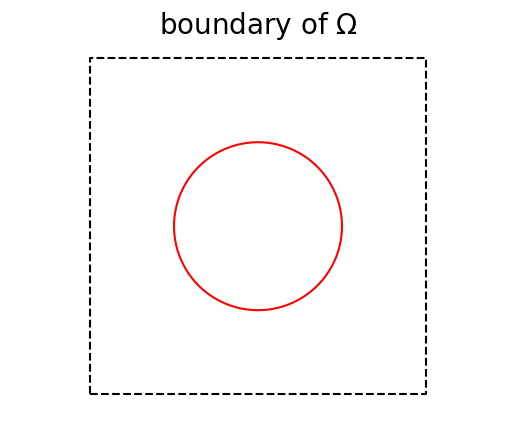

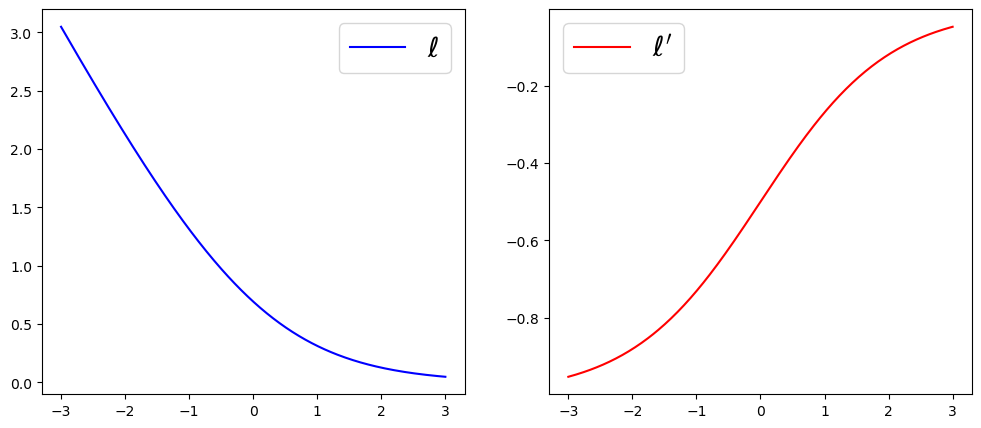

In [3]:
pb = ToyPb(name = "disk", bounds = (-1,1), loss_name = "softplus")


print(f"pb.name={pb.name}, pb.bounds={pb.bounds}")


pb.show_border()
plt.title(f"boundary of $\Omega$",fontsize=20)
plt.show()

loss, loss_prime = pb.loss, pb.loss_prime
t=np.linspace(-3,3,300)


plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(t,loss(t),'b',label=r"$\ell$")
plt.legend(fontsize=20)

plt.subplot(122)
plt.plot(t,loss_prime(t),'r',label=r"$\ell'$")
plt.legend(fontsize=20)
plt.show()

You can try with _name_ = "square", "sin" or "ring" and with *loss_name* = "demanding".

## The \_\_init\_\_ method of the class ToyPb

**Parameters of the \_\_init\_\_ method**

\*\*kwargs :<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
_f_ : numerical function $(x_0,x_1)\in\mathbb{R}^2\mapsto f(x_0,x_1)\in\mathbb{R}$ (optional if _name_ is given)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
_name_ : string (optional if _f_ is given)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
*bounds*=(-1,1) : a tuple of 2 or 4 floats<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
*loss*, *loss_prime* : numerical functions: $\mathbb{R}\to\mathbb{R}$ (optional)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
*loss_name*: string                (optional)

**Behaviour of the \_\_init\_\_ method.**

The possible values for _name_ are "sin", "affine", "disk", "square", "ring".

If _bounds_ is the tuple ($x_-$,$x_+$) with length 2, then *pb.bounds* receives the value ($x_-$,$x_+$,$x_-$,$x_+$).<br>
If _bounds_ is a tuple with length 4, *pb.bounds* receives the value _bounds_. 

The possible values for *loss_name* are "softplus" and "demanding".<br> 
For "softplus", 
$$
\ell(t)=\ln\left(1 + e^{-t}\right).
$$
For "demanding", 
$$
\ell(t)=\sqrt{(t - 1)^2+1/10} - t + 1
$$
If the parameters *loss_name* and at least one of the parameters *loss* or *loss_prime* is not specified, then the deffect value for the loss function is:
$$
\ell(t)=\sqrt{t^2+1/10} - t.
$$

# 2. The class nD_data <a id='II'></a> 

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#V">5.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

An object of the class *nD_data* essentially contains:<br>
($*$) a set of points of the plane:  $x^i=(x^i_0,x^i_1)$ for $i=0,\dots,n-1$,<br>
($*$) a set of labels $y^i\in\{-1,1\}$ for $i=0,\dots,n-1$ corresponding to the exact classification of the points $(x^i_0,x^i_1)$ with respect to a problem *pb* in the class _ToyPb_.,<br>
($*$) possibly a set of predictions $y^i_{pred}\in\mathbb{R}$ for $i=0,\dots,n-1$.

If _data_ is in this class:<br>
($*$) _data.n_ is an integer (the size of the sets).<br>
($*$) _data.X_ is a numpy array of size $n\times2$. With the above notation, *data.X*[i,0]$=x^i_0$, *data.X*[i,1]$=x^i_1$.<br>
($*$) _data.Y_ is a numpy array of length $n$. With the above notation, *data.Y*[i]$=y^i$.<br>
($*$) *data.Ypred* is also a numpy array of length $n$ and *data.Y*[i]$=y_{pred}^i$.

__Remarks:__<br>
(a) *data.Ypred* is created only if *init_pred=True*. In this case it is initialized as a zero numpy array.<br>
(b) For computing *data.Y* it is necessary to specify an object *pb* in the class *ToyPb*. The numpy array *data.Y* is then created according to the rule:
$$
\textit{data.Y}\text{[i]}:=
\begin{cases}
-1&\text{if }\textit{pb.f}(\textit{data.X}\text{[i]})\geq0,\\
\phantom{-}1&\text{if }\textit{pb.f}(\textit{data.X}\text{[i]})<0.
\end{cases}
$$
(c) The method *show_class()* displays the classification.

data.n=1000
data.X.shape=(1000, 2)
data.Y.shape=(1000,)
data.Ypred.shape=(1000,)


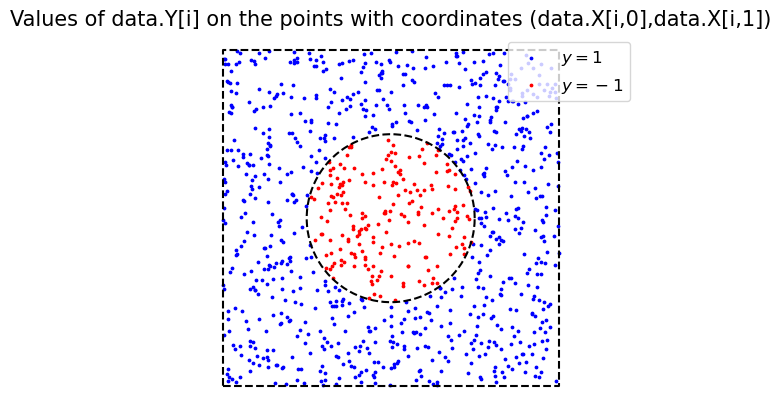

In [4]:
pb = ToyPb(name = "disk", bounds = (-1,1), loss_name = "softplus")

ndata = 1000
data = nD_data(n = ndata, pb = pb, init_pred=True)
print(f"data.n={data.n}")
print(f"data.X.shape={data.X.shape}")
print(f"data.Y.shape={data.Y.shape}")
print(f"data.Ypred.shape={data.Ypred.shape}")


data.show_class()

pb.show_border('k--')

plt.legend(loc=1,fontsize=12)
title1="Values of data.Y[i] on the points with"
title2=" coordinates (data.X[i,0],data.X[i,1])"
plt.title(title1 + title2, fontsize=15)
plt.show()

## The \_\_init\_\_ method of the class nD_data

**Parameters of the \_\_init\_\_ method**

\*\*kwargs :<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) _n_ : integer (>0)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) _X_ : numpy array of shape *n*$\times$*2*<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) _Y_ : numpy array of length _n_<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) _f_ : numerical function $(x_0,x_1)\in\mathbb{R}^2\mapsto f(x_0,x_1)\in\mathbb{R}$ (optional)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) _pb_ : object of type ToyPb<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) *bounds*=(-1,1) : a tuple of 2 or 4 floats<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) *init_pred*=None : boolean

**Behaviour of the \_\_init\_\_ method.**

If *bounds*$=(x_0^-,x_0^+)$ then the attribute _bounds_ receives $(x_0^-,x_0^+,x_0^-,x_0^+)$.<br>
If *bounds*$=(x_0^-,x_0^+,x_1^-,x_1^+)$ then the attribute _bounds_ receives _bounds_.<br>
In the sequel, we denote _bounds_$=(x_0^-,x_0^+,x_1^-,x_1^+)$.

If _X_ and _Y_ are given they are sent to the corresponding attributes of the object. 

If _X_ and _Y_ are not given, the \_\_init\_\_ method creates two atributes _X_ and _Y_.<br>
_X_ is a numpy array of size _n_$\times$_2_. The coefficients of _X_ are picked randomly *X*[i,0] is picked in $[x_0^-,x_0^+]$ and *X*[i,1] in $[x_1^-,x_1^+]$.<br>
_Y_ is a numpy array of length _n_ which is defined with the rule.
$$
\textit{Y}\text{[i]}:=
\begin{cases}
-1&\text{if }\textit{g}(\textit{X}\text{[i,0]},\textit{X}\text{[i,1]})\geq0,\\
\ 1&\text{if }\textit{g}(\textit{X}\text{[i,0]},\textit{X}\text{[i,1]})<0,
\end{cases}
$$
where _g_=_f_ if _f_ is specified and _g_=_pb.f_ if not.


If *init_pred=True* then an attribute *Ypred* is created which receives a zero numpy array of length _n_ (an array with the same shape as _Y_ and with zero entries).

# 3. The class toyNN <a id='III'></a> 

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#V">5.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;
<a href="#bot">bot.</a>

An object of the class _toyNN_ contains the characteristics of a neural network (number of hidden layers, number of nodes in each layer, activation function) __but__ not the coefficients of a specific neural network with this shape. 

The number of  layers and nodes in a neural network is described as a tuple
$$
\text{CardNodes}=(a_0,a_1,\dots,a_{N-1},a_N),
$$
where $a_n$ is the number of nodes in the $n^{\text{th}}$ layer .<br> 
There are $N-1$ hidden layers.<br> 
The neural networks of interest for the classification problems of part __1__ have two input nodes and one output node. Hence 
$$
a_0=2\qquad\text{ and }\qquad a_N=1.
$$
(In the optimization process, the two input nodes will be fed with the coordinates $(x_0,x_1)$ of the points to classify. The output will be a real number that we want to be positive for input points in $\Omega$ and negative in the other cases.)<br>
The neural networks are also characterized by an activation function $\chi$.

The atributes of an object *nn* in this class are the following.<br>
($*$) _nn.N_ is an integer. The number of hidden layers is *nn.N*$-1$.<br>
($*$) _nn.card_ is a tuple of integers which contains the number of nodes in each layer.<br>
($*$) _nn.Nparam_ is the number of free coefficients of a neural network of type *nn*. Denoting $N=$_nn.N_ and $(a_0,a_1,\dots,a_{N-1},a_N)=$*nn.card*, we have 
$$
\textit{nn.Nparam}=\sum_{n=0}^{N-1}a_na_{n+1} +\sum_{n=1}^N a_n.
$$
($*$) *nn.coef_bounds* is a 4-tuple of floats. It may be used when the coefficients of the neural network (weights and biasses) are picked randomly in the method *nn.create_rand*.<br> 
($*$) *nn.chi* is an implementation of the activation function $\chi$.<br>
($*$) *nn.chi_prime* is an implementation of the derivative $\chi'$ of $\chi$.<br>
($*$) *nn.xx*, *nn.yy* and *nn.zz* are three 2D numpy arrays used in the graphic representations of the neural networks' outputs (in the method *nn.show_pred*).<br> 

Below, we create a typical object in the class *ToyNN*.  

nn.N=4
nn.card=(2, 4, 6, 5, 1)
nn.coef_bounds=(-1, 1, -1, 1)
nn.Nparam=83


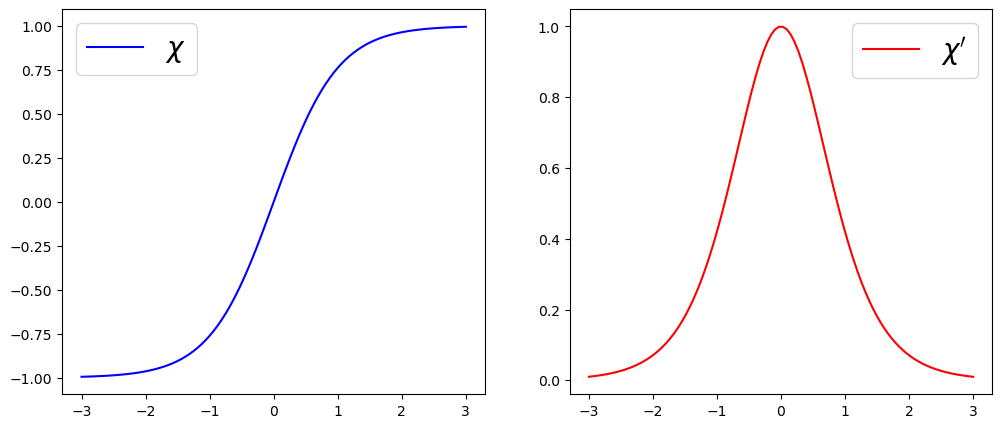

In [5]:
CardNodes = (2, 4, 6, 5, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))

print(f"nn.N={nn.N}")
print(f"nn.card={nn.card}")
print(f"nn.coef_bounds={nn.coef_bounds}")
print(f"nn.Nparam={nn.Nparam}")

chi, chi_prime = nn.chi, nn.chi_prime
t=np.linspace(-3,3,100)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(t,chi(t),'b',label=r"$\chi$")
plt.legend(fontsize=20)
plt.subplot(122)
plt.plot(t,chi_prime(t),'r',label=r"$\chi'$")
plt.legend(fontsize=20)
plt.show()

With the method *nn.create_rand()* we can build lists *A*$=$[*W,Bias*] where *W* and *Bias* are both lists of _N_ numpy arrays. The coefficients in these arrays are the parameters of a neural network. _W_ contains the weights of the edges and _Bias_ the weights of the nodes.<br>
More precisely, for $n=0,\dots,N-1$ denoting $a_n$ the number of nodes in the $n^{\text{th}}$ layer:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) *W*[n][i,j]$=:w^{n}_{i,j}$ is the weight of the edge from the $i^{\text{th}}$ node of layer $n$ to the $j^{\text{th}}$ node of layer $n+1$.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) *Bias*[n][i]$=:b^{n}_{i}$ is the weight on the $i^{\text{th}}$ node of layer $n+1$.

__How is computed the ouput $h$*(X,A)* provided by a neural network given an input *X*$=:(x_0,x_1)$ ?__

Let us number the nodes of layer $n$ as $q_j^n$ for $j=0,\cdots,a_n-1$.<br> 
We define for each node $q_j^n$ of the layers $n\in\{0,\dots,N-1\}$ an output value $O^n_j$ and for each node $q_j^n$ of the layers $n\in\{1,\dots,N\}$ an input value $I^n_j$. These quantities are defined as follows.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
The layer 0 has two nodes $q^0_0$ and $q^0_1$. We set (recall that *X*$=(x_0,x_1)$), 
$$
(q^0_0,q^0_1)\quad \longleftarrow\quad (x_0,x_1).
$$
Then for $n=0,\dots,N-2$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;we set for $j=0,\dots,a_{n+1}-1$,<br>
$$
\begin{array}{rl}
I_j^{n+1}&\longleftarrow\ \displaystyle\sum_{i=0}^{a_n-1}w^n_{i,j} O_i^n + b_j^{n+1},\\
O_j^{n+1}&\longleftarrow\ \chi(I_j^{n+1}).
\end{array}
$$
The input value $I^N_0$ associated to the unique node of the last layer is given by
$$
I_0^N\longleftarrow\ \sum_{i=0}^{a_{N-1}-1}w^{N-1}_{i,0} O_i^{N-1} + b_0^N.
$$
The output of the neural network with coefficients $A=$[*W,Bias*] for the input data $x=(x_0,x_1)$ is then defined as
$$
h(x,A):=I_0^N.
$$

__Example__: below we define an object _nn_ in the class _ToyNN_ and use it to build a list *A*=[*W,Bias*] which contains the weights of a neural network.<br>
These weights are chosen randomly and uniformly in $[w_-,w_+]$ for the $w^n_{i,j}$'s and in $[b_-,b_+]$ for the $b^n_i$'s where $(w_-,w_+,b_-,b_+)=$*nn.coef_bounds*.

W[0]=[[-0.88706455 -0.04260215 -0.99718922]
 [-0.78530999 -0.22834032 -0.63604186]]

W[1]=[[ 0.47247191  0.22060567 -0.98641395  0.30575492]
 [ 0.04662941  0.44567184 -0.58291326 -0.34175025]
 [ 0.07937453  0.80796289 -0.56861314 -0.82848566]]

W[2]=[[-0.17128722 -0.27598196]
 [ 0.29378616  0.23226449]
 [-0.79668019 -0.72958371]
 [-0.79913032  0.9143472 ]]

W[3]=[[ 0.23929022]
 [-0.83750666]]

Bias[0]=[-0.4720119  -0.80866175  0.341695  ]

Bias[1]=[-0.08358803  0.79242781 -0.11105826  0.73535586]

Bias[2]=[ 0.85335574 -0.17220326]

Bias[3]=[0.27578607]



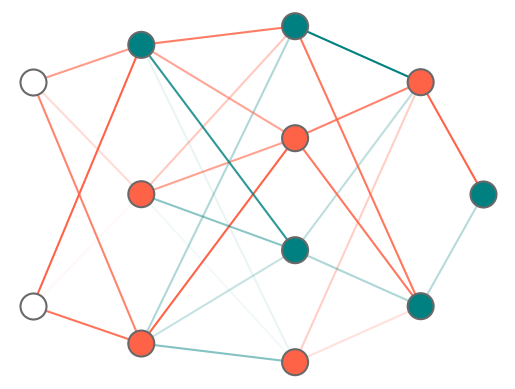

 The width of the edges is proportional to the absolute values of the corresponding weights.
 The color depends on their signs: red if negative, green if positive.
 The nodes are colored according to the sign of the corresponding biasses with the same convention.


In [6]:
CardNodes = (2, 3, 4, 2, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
A=nn.create_rand()
for n in range(nn.N):
    print(f"W[{n}]={A[0][n]}\n")
for n in range(nn.N) :   
    print(f"Bias[{n}]={A[1][n]}\n")
    
nn.show(A)
text1=" The width of the edges is proportional to the absolute values"
text2=" of the corresponding weights.\n The color depends on their signs:"
text3=" red if negative, green if positive.\n The nodes are colored"
text4=" according to the sign of the corresponding biasses"
text5=" with the same convention."
print(text1 + text2 + text3 + text4 + text5)

# 4. Methods for basic operations on lists of weights <a id='IV'></a>  

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#V">5.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Let us test the basic operations available in the library.<br>
We start by creating an object _pb_ of type *ToyPb*, an object _nn_ of type *ToyNN* and then two lists of random weights _A_, _B_.<br> 
In the sequel such objects are called _coef-lists_. For shortness the weights stored in _A_ are denoted $A_i$.

A:


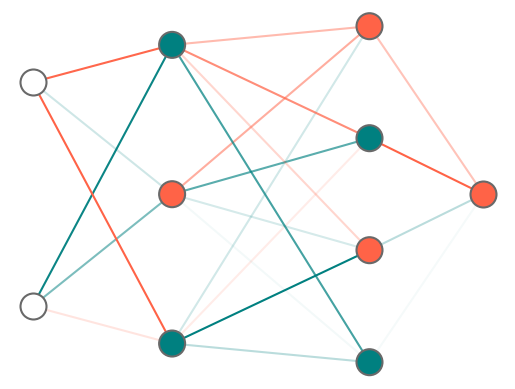

B:


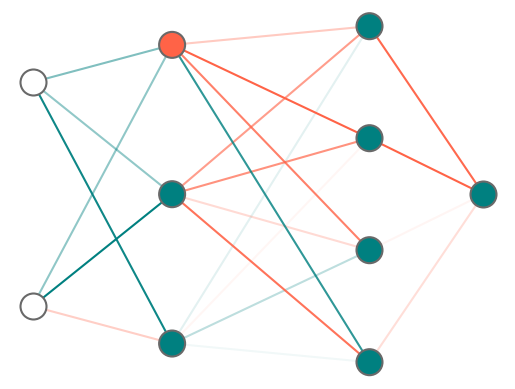

In [7]:
pb = ToyPb(name = "square", bounds = (-1,1), loss_name = "softplus")

CardNodes = (2, 3, 4, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
A = nn.create_rand()
B = nn.create_rand()

print("A:")
nn.show(A)
print("B:")
nn.show(B)

We add _A_ and 2.5 times _B_ and put the result in a new coef-list _C_, that is
$$
\textit{C}\ \leftarrow\ \textit{A}+2.5\times\textit{B}.
$$

A + 2.5 x B:


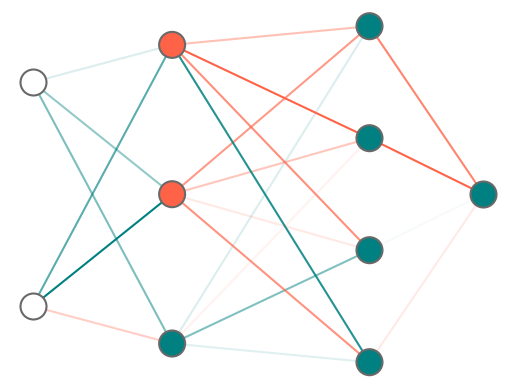

In [8]:
C=nn.add(A,B,c=2.5)
print("A + 2.5 x B:")
nn.show(C)

We can also put tHe result in _A_.

In [9]:
nn.add(A,B,c=2.5,output=False)

After this _C_ and _A_ should be equal. Let us check this.

coefficients of D=A - C
[array([[0., 0., 0.],
       [0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0.],
       [0.],
       [0.],
       [0.]])]
[array([0., 0., 0.]), array([0., 0., 0., 0.]), array([0.])]


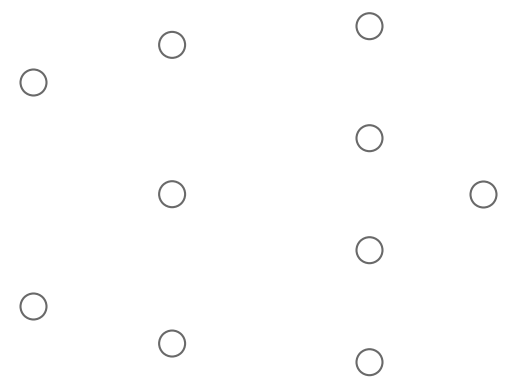

In [10]:
D=nn.add(A,C,c=-1)
print("coefficients of D=A - C")
print(D[0])
print(D[1])
nn.show(D)

It can be also usefull to be create a zero coef-list. This is done by:

a zero coef-list:


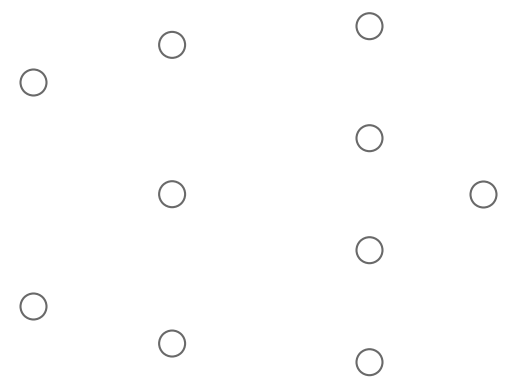

In [11]:
E=nn.create_zero() 
print("a zero coef-list:")
nn.show(E)

To make a (true, deep) copy of a coef_list, we do:

A:


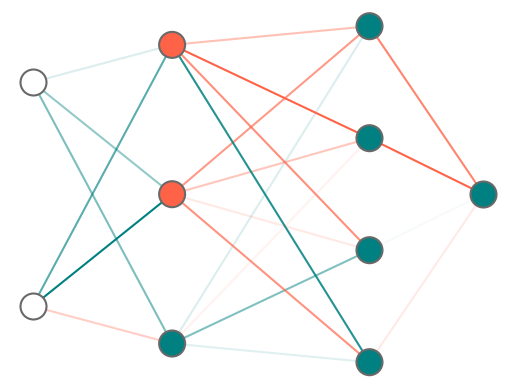

D (copy of A):


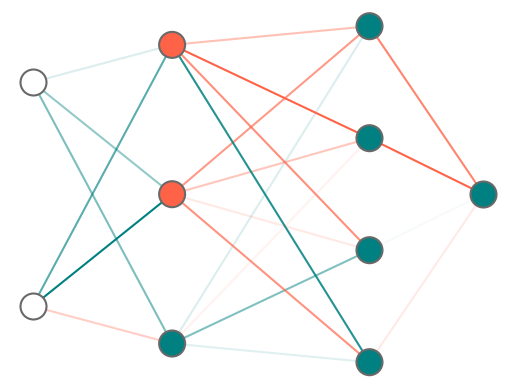

In [12]:
D=nn.copy(A)
print("A:")
nn.show(A)
print("D (copy of A):")
nn.show(D)

We change _A_ and check that _D_ has not been modified

A after modification:


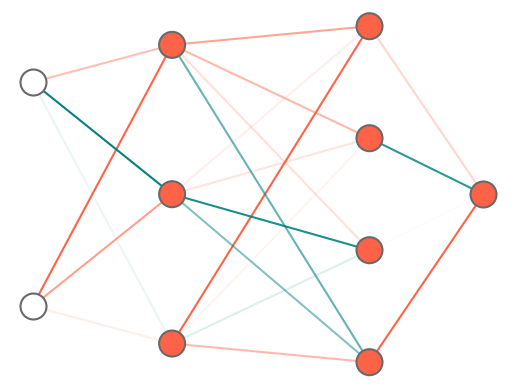

D:


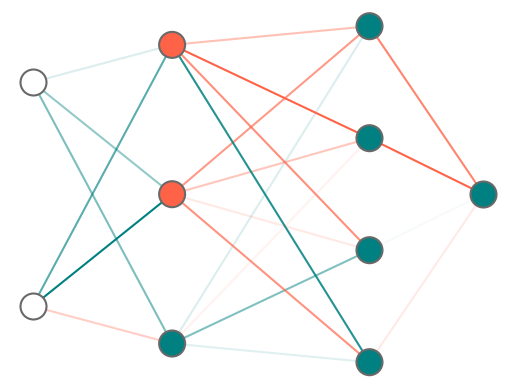

In [13]:
A=nn.create_rand()
print("A after modification:")
nn.show(A)
print("D:")
nn.show(D)

Other methods for operations on coef_lists:<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) if _c_ is a scalar and _A_ is a coef_list, *nn.scal_mult(A,c)* returns the coef list with weights *c*$\times A_i$.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) if _A_ and _B_ are coef_lists *nn.dot(A,B)* returns the dot products of the two vectors containing all the coefficients of _A_ and _B_, that is 
$$
\sum_i A_i B_i.
$$ <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) if _A_ is a coef_list, *nn.square(A)* returns a coef-list with the same structure as _A_ and with weights ${A_i}^{\!2}$.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) if _A_  is a coef-list and _f_ is a numerical function (compatible with numpy) then *nn.maps(f,A)* returns the coef-list with weights $f(A_i)$.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) if _A_ and _B_ are coef-lists  and *f* is a numerical function of two variables, then *nn.maps2(A,B)* returns the coef-list with weights $f(A_i,B_i)$.

In the methods *square*, *maps* and *maps2*, it is possible to precise the parameter *output*$=$False. In this case the result is not returned but put in _A_.  

In the method *maps* (respectively *maps2*), the function _f_ may depend on an additional parameter, precised by *param*$=p$. In this case the computed  weigths are $f(A_i,p)$ (resp. $f(A_i,B_i,p)$). See the examples below. 

In [14]:
A=nn.create_rand()
B=nn.create_rand()

print("Test of nn.scal_mult:")
fact=3
C=nn.scal_mult(A,fact)
D=nn.add(A,C,c=-1/fact)
print("A-(1/3)*(3*A)=\n",D)

print("\nTest of nn.dot:")
print(f"nn.dot(A,B)={nn.dot(A,B):1.5e}")

Test of nn.scal_mult:
A-(1/3)*(3*A)=
 [[array([[0.00000000e+00, 0.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[-1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]]), array([[0.],
       [0.],
       [0.],
       [0.]])], [array([0., 0., 0.]), array([0., 0., 0., 0.]), array([0.])]]

Test of nn.dot:
nn.dot(A,B)=4.26661e-01


Test of nn.square:
A


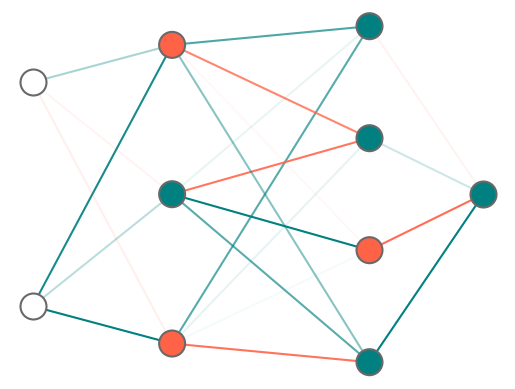

A^2


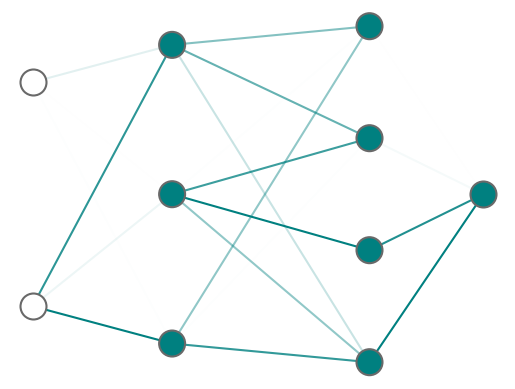

A^4


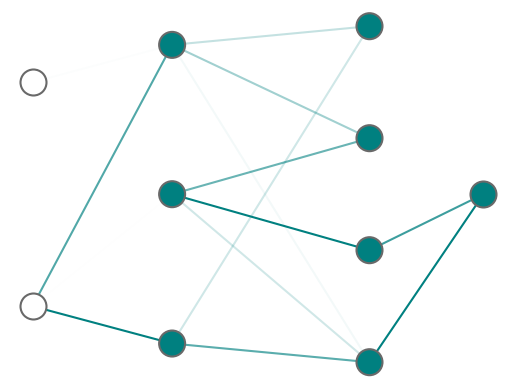


Test of nn.maps:
A^2-f(A) with f(x)=x^2


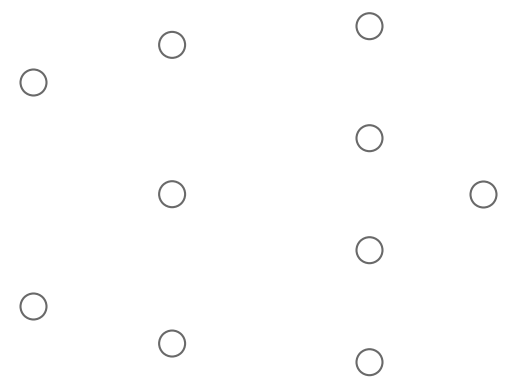


Test of nn.maps2:
A^2-f(A,A) with f(x,y)=x*y


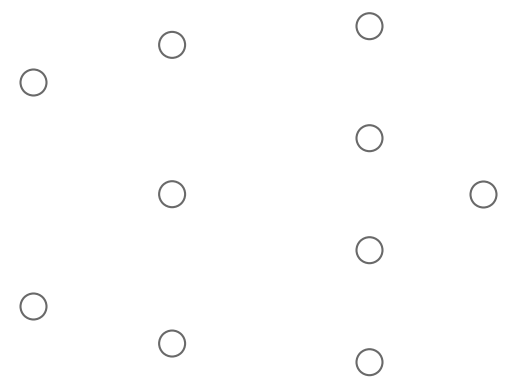

In [15]:
print("Test of nn.square:")
A2=nn.square(A)
A4=nn.square(A2)
print("A")
nn.show(A)
print("A^2")
nn.show(A2)
print("A^4")
nn.show(A4)

print("\nTest of nn.maps:")
f = lambda x:x**2
fA=nn.maps(f,A)
D=nn.add(A2,fA,-1)
print("A^2-f(A) with f(x)=x^2")
nn.show(D)


print("\nTest of nn.maps2:")
f = lambda x,y:x*y
fAA=nn.maps2(f,A,A)
D=nn.add(A2,fAA,-1)
print("A^2-f(A,A) with f(x,y)=x*y")
nn.show(D)

Test nn.maps with additional parameters:
sin(π/2 A) + sin(π/6 A):


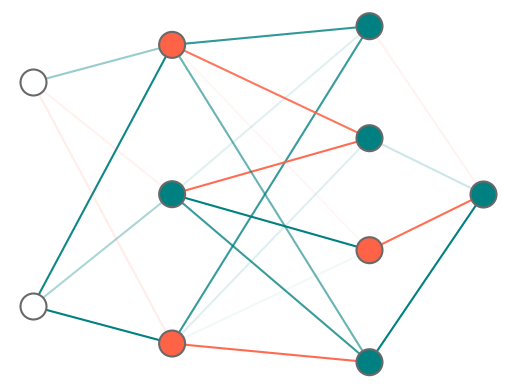


Test nn.maps2:
exp(1/2 A - 3/2 B):


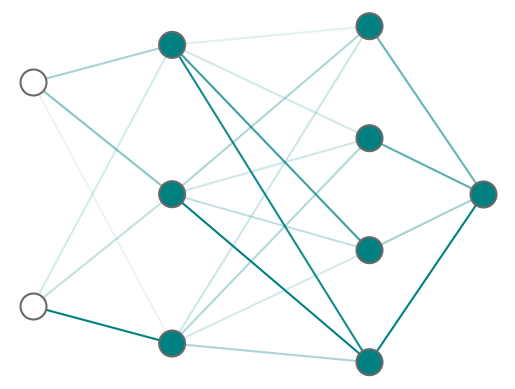

In [16]:
print("Test nn.maps with additional parameters:")
f = lambda x, p : np.sin(p[0]*x)+np.sin(p[1]*x)
p=(np.pi/2,np.pi/6)
fAp=nn.maps(f,A,param=p)
print("sin(π/2 A) + sin(π/6 A):")
nn.show(fAp)

print("\nTest nn.maps2:")
f = lambda x,y,p: np.exp(p[0]*x + p[1]*y)
p=(.5,-1.5)
fABp=nn.maps2(f,A,B,param=p)
print("exp(1/2 A - 3/2 B):")
nn.show(fABp)

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#V">5.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

# 5. Methods for optimization <a id='V'></a>  

In this part, we present the following methods associated with an object _nn_ of type _ToyNN_. They take as arguments a coef-list _A_ and depending on the method: a numpy array _x_ with lenth 2 and/or a float _y_, or an object _data_ of type *nD_data* and/or an object _pb_ of type _ToyPb_.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The method _nn.output_ computes the output $h(x,A)$ produced by a neural network with weights *A*$=A_i$ for a given input $x=(x_0,x_1)$.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) the method _nn.descent_ computes the opposite gradient of the function
$$
A\mapsto \ell\left(h(x,A)\times y\right)
$$
where $A$, $x$ are as above, $y$ is a tag associated to $x$ and $\ell$ is a loss function associated with some object _pb_ of type _ToyPb_.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The method _nn.prediction_ computes the outputs of _A_ at the points of a data set _data_ of type *nD_data* and put the result in the array _data.Ypred_.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The method *data.show_class* with the argument *pred*=True displays this predicted classification.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The method *show_pred* computes the outputs _nn.zz_ predicted by a coef-list _A_ on a grid (*nn.xx*,*nn.yy*) and displays the result as a heat map.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The method *nn.total_loss* computes the mean loss 
$$
\dfrac1{n_d}\sum_{j=0}^{n_d-1} \ell\left(h(X_j,A)\times y_j\right),
$$
where the $X_j$'s and $y_j$'s are the points and tags in a data set _data_ of type *nD_data*. Namely, $n_d=$*data.n*, $X_j=$*data.X*[j], $y_j=$*data.Y*[j].<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The method *nn.total_loss_and_prediction* combines the methods *nn.total_loss* and *nn.prediction*.

In general, the user does not need to call _nn.ouput_.

In [ ]:
CardNodes = (2, 3, 4, 2, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
A=nn.create_rand()

x=np.array([0.5,-0.3])
o=nn.output(A,x)
print(f"x={x}")
print(f"output(A,x)={o:1.5f}")

x=np.array([-0.75,0.25])
o=nn.output(A,x)
print(f"x={x}")
print(f"output(A,x)={o:1.5f}")

The method nn_descent is the heart of gradient descent algorithms. It computes the opposite gradient with respect to the coefficienst $A_i$ of _A_ of the mapping
$$
F_{x,y}:A\mapsto \ell\left(h(x,A)\times y\right).
$$
It returns a coef-list _dA_ with coefficients 
$$
(dA)_i =-\dfrac{\partial F_{x,y}}{\partial A_i}(A).
$$
It takes as arguments: a coef-list _A_, a np.array $x$ with length 2, a float _y_ and an object _pb_ of type _ToyPb_ (the loss function $\ell$ is then *pb.loss*).

In [ ]:
pb = ToyPb(name = "sin", bounds = (-1,1), loss_name = "softplus")

CardNodes = (2, 3, 4, 2, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))

A=nn.create_rand()

x=np.array([-0.75,0.25])
y=1

dA=nn.descent(A,x,y,pb=pb)

print(f"x={x}, y={y}")
print(f"dA=-Gradient Fxy(A)")
nn.show(dA)

There are optional arguments _alpha_ and _B_.<br>
If the float _alpha_ is specified, the weights of the returned coef-list are 
$$
(dA)_i =-\alpha\dfrac{\partial F}{\partial A_i}(A).
$$
If a coef-list _B_ is specified, the result is not returned but added to _B_. This is handy when using a mini-batch method.

In [ ]:
x=np.array([-0.75,0.25])
y=1

print("Test of the parameter alpha.")
dA=nn.descent(A,x,y,pb=pb)
dA_one_half=nn.descent(A,x,y,alpha=1/2, pb=pb)

D=nn.add(dA,dA_one_half,-2)
print("dA(alpha=1) - 2xdA(alpha=1/2)")
nn.show(D)

print("Test of the parameter B.")

DA=nn.create_zero()

x=np.array([-0.75,0.25])
y=1
nn.descent(A,x,y, B=DA, pb=pb)
print("DA after one contribution")
nn.show(DA)

x=np.array([0.5,-0.2])
y=-1
print("DA after two contributions")
nn.descent(A,x,y, B=DA, pb=pb)
nn.show(DA)

The method _nn.prediction_ uses the method _nn.output()_ to compute the predictions of the neural network on the point of a data set _data_ of type *nD_data* and store the result in _data.Ypred_ 

The method *data.show_class(pred=True)* displays these predictions.

The method *nn.show_pred* compute the predictions of the neural network on a grid and  displays these predictions as a heat map.

In [ ]:
pb = ToyPb(name = "ring", bounds = (-1,1), loss_name = "softplus")

data = nD_data(n=500, pb=pb)

CardNodes = (2, 3, 4, 2, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
A=nn.create_rand()


data.show_class()
pb.show_border('k--')
plt.axis('off')
plt.title("Correct answer", fontsize=15)
plt.show()


nn.prediction(A, data)

data.show_class(pred=True)
nn.show_pred(A)
pb.show_border('k--')
plt.title("predictions of a random  A", fontsize=15)
plt.show()

To assess the performance of a coef-list _A_ for a given problem _pb_ on a  given data set *data*, we use the method *total_loss*. It returns,
$$
\dfrac1{n_d}\sum_{i=0}^{n_d-1} \ell\left(h(X_i,A)\times y_i\right),
$$
where $n_d=$*data.n*, the $X_i$'s and $y_i$'s are the points and tags in _data.X_ and _data.Y_ and $\ell$ is the function _pb.loss_.<br>

In [ ]:
pb = ToyPb(name = "ring", bounds = (-1,1), loss_name = "softplus")

data = nD_data(n=500, pb=pb)

CardNodes = (2, 3, 4, 2, 1)
nn = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
A=nn.create_rand()

error = nn.total_loss(A,data,pb=pb)
print(error)

The method *nn.total_loss_and_prediction* combines the effects of *nn.total_loss* and *nn.prediction*.

In [ ]:
error2 = nn.total_loss_and_prediction(A,data,pb=pb)
print(f"error ={error},\nerror2={error2}")

data.show_class(pred=True)
nn.show_pred(A)
pb.show_border('k--')
plt.title("predictions of A", fontsize=15)
plt.show()

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#V">5.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>
<a id='bot'></a> 